# Classifying Mall Customers

## Introduction
Clustering's main task is to discover natural groups within an unlabeled dataset - this is an unsupervised ML task. And it's an important one, as it's used in a variety of scientific, engineering, and business fields. Among the most well-known applications of clustering are:  
* customer segmentation (for efficient marketing)
* image segmentation
* document clusterisation.
  
There are many clustering algorithms which can be divided into two main types: hierarchical and partitional.

* <u>Hierarchical</u> clustering algorithms cycle through the process of merging smaller clusters into larger clusters or dividing larger clusters into smaller clusters. In either case, it generates a dendogram, which is a hierarchy of clusters. Agglomerative clustering uses a bottom-up approach to merge clusters into larger ones, whereas divisive clustering uses a top-down approach to split into smaller ones. Typically, the greedy approach is used to determine which larger/smaller clusters to merge/divide. Some of the most commonly used metrics of similarity for numerical data are Euclidean distance, Manhattan distance, and cosine similarity. Metrics such as the Hamming distance are used for non-numerical data. </li>     

* <u>Partitional</u> clustering algorithms partition a dataset according to a set of criteria into multiple subsets, or clusters. Certain algorithms, like K-Means, require the number of clusters to be predetermined, while others do not (DBSCAN). Prior to executing an algorithm, defining the number of clusters frequently calls for specialized domain knowledge, which is difficult or impossible to obtain in many situations. As a result, numerous heuristics and streamlined methods were created to assist analysts lacking domain expertise in selecting the right number of clusters.</li>

There are numerous clustering methods, and no single one currently dominates the others. Choosing the best one is determined by the database, the application domain, and the client's requirements and expectations.
The partitional algorithms covered in this notebook include K-Means, DBSCAN, and ?(UPDATE!). All of this is done via a well-known Python module called Scikit-Learn.

<div>
<img src="https://cdn.denvermart.com/how_are_shopping_malls_doing.jpg" width="1000"/>
</div>


Image Source: [Denver Mart](https://www.denvermart.com/why-shopping-malls-are-doing-better-than-you-think/)

#### Our Reseach Problem

We are data scientists for a large supermarket with regional brands in shopping centers. We receive basic information about our consumers, such as age, gender, annual income, level of education, and city size, via membership cards. We are also provided a customer spending score, which is something you allocate to the consumer depending on characteristics you set, such as customer behavior and purchasing data. We want to know who our target customers are so that we can develop an accurate strategy for the mall's marketing team.

The main goal of this project is to learn the purpose of customer segmentation concepts, also known as market basket analysis, and to try to understand customers and divide them into different groups based on their preferences. Once the division is completed, this information can be given to the marketing team so that they can plan their strategy accordingly.

## Table of Contents
---
- [Introduction](#Introduction)
  - [Our Research Problem](#Our-Research-Problem)
- [Helper Functions](#Helper-Functions)
- [Reading Data](#Reading-Data)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  - [Distributions](#Distributions)
  - [Correlations](#Correlations)
- [Data Visualization](#Data-Visualization)
- [Clustering](#Clustering)
  - [K-Means](#K-Means)
  - [DBSCAN](#DBSCAN)
  - [GMM](#GMM)
- [Dimensionality Reduction](#Dimensionality-Reduction)  
- [Best Performing Model](#Best-Performing-Model)
- [Discussion and Recommendations](#Discussion-and-Recommendations)

## Helper Functions

In [5]:
# Exploratory Data Analysis

# Visualize mean/median age data
def plot_age_bins(grp1, grp2, col1, col2, title1, title2):
  age_bins = range(15, 75, 5)

  # Plotting using displot
  fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

  # First histogram
  sns.histplot(grp1, bins=age_bins, kde=False, color=col1, ax=ax1, edgecolor="k", linewidth=2)
  ax1.set_xticks(age_bins)
  ax1.set_ylim(top=315)
  ax1.set_title(title1)
  ax1.set_ylabel('Count')
  ax1.text(45, 243, "TOTAL count: {}".format(grp1.count()))
  ax1.text(45, 230, "Mean age: {:.1f}".format(grp1.mean()))

  # Second histogram
  sns.histplot(grp2, bins=age_bins, kde=False, color=col2, ax=ax2, edgecolor="k", linewidth=2)
  ax2.set_xticks(age_bins)
  ax2.set_title(title2)
  ax2.set_ylabel('Count')
  ax2.text(45, 243, "TOTAL count: {}".format(grp2.count()))
  ax2.text(45, 230, "Mean age: {:.1f}".format(grp2.mean()))

  plt.show()

# Label data
def labeler(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Visualize data percentages
def make_pie_chart(sizes, col1, col2, bbox_pos):
  fig0, ax1 = plt.subplots(figsize=(6,6))
  wedges, texts, autotexts = ax1.pie(sizes,
                                    autopct=lambda pct: labeler(pct, sizes),
                                    radius=1,
                                    colors=[col1,col2],
                                    startangle=90,
                                    textprops=dict(color="w"),
                                    wedgeprops=dict(width=0.7, edgecolor='w'))

  ax1.legend(wedges, ['male','female'],
            loc='center right',
            bbox_to_anchor=(0.7, 0, 0.5, 1))

  plt.text(0,0, 'TOTAL\n{}'.format(segmentation_df['Age'].count()),
          weight='bold', size=12, color='#52527a',
          ha='center', va='center')

  plt.setp(autotexts, size=12, weight='bold')
  ax1.axis('equal')  # Equal aspect ratio
  plt.show()

# Visualize mean/median income data
def plot_mean_income(grp1, grp2, col1, col2, title1, title2, xvar):
  my_bins = range(32000, 310000, 40000)

  # Plotting using displot
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 10))

  # First histogram
  sns.histplot(grp1, bins=my_bins, kde=False, color=col1, ax=ax1, edgecolor="k", linewidth=2)
  ax1.set_xticks(my_bins)
  ax1.set_ylim(0, 515)
  ax1.set_title(title1)
  ax1.set_ylabel('Count')
  ax1.text(120000, 505, "Mean income: ${:.1f}".format(grp1.mean()))
  ax1.text(120000, 485, "Median income: ${:.1f}".format(grp1.median()))
  ax1.text(120000, 465, "Std. deviation: ${:.1f}".format(grp1.std()))

  # Rotate x-axis ticks
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60, ha='right')

  # Second histogram
  sns.histplot(grp2, bins=my_bins, kde=False, color=col2, ax=ax2, edgecolor="k", linewidth=2)
  ax2.set_xticks(my_bins)
  ax2.set_ylim(0, 515)
  ax2.set_title(title2)
  ax2.set_ylabel('Count')
  ax2.text(120000, 505, "Mean income: ${:.1f}".format(grp2.mean()))
  ax2.text(120000, 485, "Median income: ${:.1f}".format(grp2.median()))
  ax2.text(120000, 465, "Std. deviation: ${:.1f}".format(grp2.std()))

  # Rotate x-axis ticks
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60, ha='right')

  # Boxplot
  sns.boxplot(x=xvar, y='Income', data=segmentation_df, ax=ax3)
  ax3.set_title('Boxplot of annual income')

  plt.show()

# Visualize income by age groups and categorical variable
def plot_income_by_age_groups(var, age_bins, label_mapping, col1, col2, plt_title):
  medians_by_age_group = segmentation_df.groupby([var,pd.cut(segmentation_df['Age'], age_bins)]).median()
  medians_by_age_group.index = medians_by_age_group.index.set_names([var, 'Age_group'])
  medians_by_age_group.reset_index(inplace=True)
  fig, ax = plt.subplots(figsize=(12, 5))

  sns.barplot(x='Age_group', y='Income', hue=var, data=medians_by_age_group,
              palette=[col1, col2],
              alpha=0.7, edgecolor='k',
              ax=ax)

  ax.set_title(plt_title)
  ax.set_xlabel('Age group')

  # Change legend labels using the mapping
  handles, labels = ax.get_legend_handles_labels()
  ax.legend(handles, [label_mapping[int(label)] for label in labels])

  plt.show()

# Visualize correlations
def visual_corr(df, corr1, corr2, var1, var2, var3, xlab, ylab):
  # Plot using lmplot
  lm = sns.lmplot(data=df, x=var1, y=var2, hue=var3, aspect=2)

  # Change legend labels
  lm._legend.set_title(var3)
  lm._legend.set_bbox_to_anchor([1, 0.5])
  lm._legend.set_title(var3)
  lm._legend.texts[0].set_text(xlab)
  lm._legend.texts[1].set_text(ylab)

  figsize=(12,6)
  if var2 == 'Income':
    plt.text(20, 300000, 'Pearson: {:.2f}'.format(corr1), color='blue')
    plt.text(70, 300000, 'Pearson: {:.2f}'.format(corr2), color='orange')
  else:
    plt.text(20, 96, 'Pearson: {:.2f}'.format(corr1), color='blue')
    plt.text(70, 96, 'Pearson: {:.2f}'.format(corr2), color='orange')

  plt.show()


In [6]:
# Data Visualization

def plot_distribution_by_income(var, plt_title, leg_entries):
  plt.figure(figsize=(8, 6))
  ax = sns.histplot(data=segmentation_df, x='Income', hue=var, palette='deep')
  plt.title(plt_title, fontweight='bold')

  # Get the existing legend
  legend = ax.get_legend()

  # Update legend labels
  legend.set_title(var)
  for text, label in zip(legend.texts, leg_entries):
      text.set_text(label)

  plt.show()

def plot_age_vs_income_scatter(var, plt_title, leg_entries):
  plt.figure(figsize=(8, 6))
  ax = sns.scatterplot(data=segmentation_df, y='Income', x='Age', hue=var, palette='deep')
  sns.move_legend(ax, "upper right")
  plt.title(plt_title, fontweight='bold')

  # Get the existing legend
  legend = ax.get_legend()

  # Update legend labels
  legend.set_title(var)
  for text, label in zip(legend.texts, leg_entries):
      text.set_text(label)

  plt.show()

In [86]:
# Clustering

def visualize_knn_clusters(k, X_num):
  KM_clusters = KMeans(n_clusters=k, n_init=10, init='k-means++', random_state=123).fit(X_num) # initialise and fit K-Means model
  KM_clustered = X_num.copy()
  KM_clustered.loc[:,'Cluster'] = KM_clusters.labels_ # append labels to points

  fig1, (axes) = plt.subplots(1,2,figsize=(12,5))
  scat_1 = sns.scatterplot(data=KM_clustered, x='Income', y='Spending score',
                  hue='Cluster', ax=axes[0], palette='Set1', legend='full')

  sns.scatterplot(data=KM_clustered, x='Age', y='Spending score',
                  hue='Cluster', palette='Set1', ax=axes[1], legend='full')

  axes[0].scatter(KM_clusters.cluster_centers_[:,1],KM_clusters.cluster_centers_[:,2], marker='s', s=40, c="orange")
  axes[1].scatter(KM_clusters.cluster_centers_[:,0],KM_clusters.cluster_centers_[:,2], marker='s', s=40, c="orange")
  plt.show()

  return KM_clustered


## Reading Data

We first import the necessary libraries and review the [Customer Clustering dataset](https://www.kaggle.com/datasets/dev0914sharma/customer-clustering) to see if we need to perfom any data cleaning.


In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
from scipy import stats
from scipy.stats import pearsonr

from itertools import product
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [8]:
segmentation_df = pd.read_csv('segmentation_data.csv')
print('There are {} rows and {} columns in our dataset.'.format(segmentation_df.shape[0],segmentation_df.shape[1]))

There are 2000 rows and 9 columns in our dataset.


In [9]:
segmentation_df.sample(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Spending score
236,100000237,0,0,23,0,167076,0,2,38
1387,100001388,1,0,24,1,104291,1,0,23
1459,100001460,1,0,52,2,124196,0,0,46
463,100000464,0,0,38,1,106552,1,2,37
1891,100001892,1,1,35,1,92194,0,0,25
351,100000352,1,1,29,1,108434,1,2,19
38,100000039,0,0,37,1,119276,1,1,42
1563,100001564,1,1,34,1,127255,1,0,28
1371,100001372,1,1,36,1,147691,1,1,38
748,100000749,0,0,26,0,131122,1,0,27


In [10]:
segmentation_df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Spending score
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000,35.317500
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533,12.544456
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000,7.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000,26.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000,34.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000,43.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000,91.000000


By reviewing the data dictionary, we see that the dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical store. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed and there are no missing values. In addition, the volume of the dataset has been restricted and anonymised to protect the privacy of the customers.

There are 9 columns:

- `ID`-numerical-integer: Shows a unique identificator of a customer.
- `Sex`-categorical-{0,1}: Biological sex (gender) of a customer.
  - 0 Male
  - 1 Female
- `Marital Status`-categorical-{0,1}: Marital status of a customer.
   - 0 Single
   - 1 Non-Single (divorced / separated / married / widowed)
- `Age`-numerical-integer: The age of the customer in years.
   - Min value (the lowest age observed in the dataset)
   - Max value (the highest age observed in the dataset)
- `Education`-categorical-{0,1,2,3}: Level of education of the customer.
  - 0 Other / Unknown
  - 1 High School
  - 2 University
  - 3 Graduate School
- `Income`-numerical-real: Self-reported annual income in US dollars of the customer.
  - \$35,832 Min value (the lowest income observed in the dataset)
  - \$309,364 Max value (the highest income observed in the dataset)
- `Occupation`-categorical-{0,1,2}: Category of occupation of the customer.
  - 0 Unemployed/Unskilled
  - 1 Skilled Employee / Official
  - 2 Management / Self-Employed / Highly Qualified Employee / Officer
- `Settlement size`-categorical-{0,1,2}: The size of the city that the customer lives in.
  - 0 Small City
  - 1 Mid-Sized City
  - 2 Big City
- `Spending score`-numerical-integer: Numerical score between 0-100 for customer spending potential.
  - 0 (Low spending potential)
  - 100 (High spending potential)


Before we do any further analysis, we will perform the following two changes:
1.   As Settlement size refers to the size of cities, we will rename this variable to City size.
2.   The customer ID is not useful for further analysis. We will drop this column.

In [11]:
# Rename Settlement size to City size
segmentation_df = segmentation_df.rename(columns = {'Settlement size' : 'City size'})

# Drop the customer ID column
segmentation_df.drop('ID', axis=1, inplace=True)

Following the recommendations by [IBM](https://www.ibm.com/support/pages/clustering-binary-data-k-means-should-be-avoided), we won't one-hot encode the remaining categorical columns.

In [12]:
segmentation_df.isnull().sum()

Sex               0
Marital status    0
Age               0
Education         0
Income            0
Occupation        0
City size         0
Spending score    0
dtype: int64

As noted in the data dictionary, there is no missing data. Therefore, we won't perform data cleaning.

## Exploratory Data Analysis

#### Distributions
We will now analyze distributions of numerical variables in detail. For brevity, we will stratify `Age` and `Income` by the categorical variables `Sex` and `Maritial Status`. We will start with `Sex` and create a variety of helper functions.

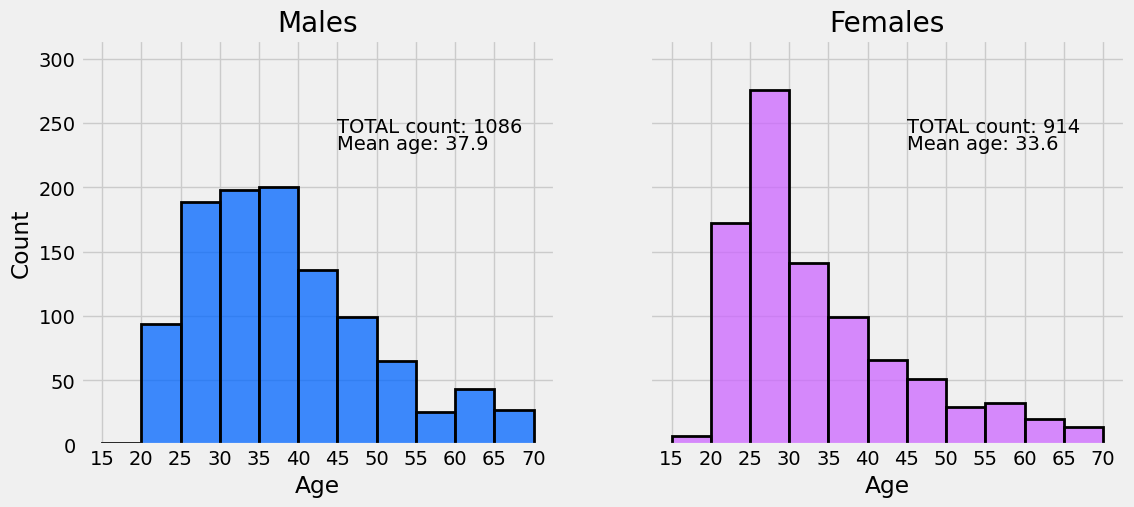

In [13]:
# Data subsets
males_age = segmentation_df[segmentation_df['Sex'] == 0]['Age']
females_age = segmentation_df[segmentation_df['Sex'] == 1]['Age']

# Age bins
age_bins = range(15, 75, 5)

plot_age_bins(males_age, females_age,'#0066ff','#cc66ff','Males', 'Females')

In [14]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_age, females_age)[1]))

Kolgomorov-Smirnov test p-value: 0.00


The average age of male customers is higher than female customers (37.9 against 33.6). Also, the distribution of male age is more uniform than females, where we can observe that the biggest age group is 25-30 years old. The Kolgomorov-Smirnov test shows that the differences between these two groups are statistically significant. There are also more male customers than female customers.


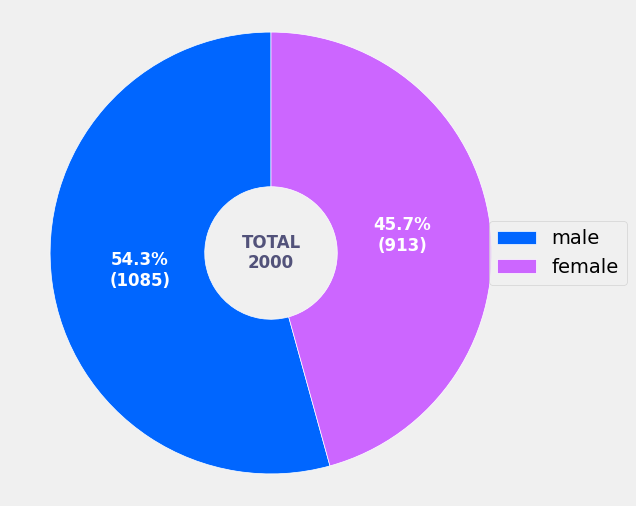

In [15]:
sizes = [males_age.count(),females_age.count()] # wedge sizes

make_pie_chart(sizes, '#0066ff','#cc66ff', (0.7, 0, 0.5, 1))

Males account for slightly more than 54% of the total customers.

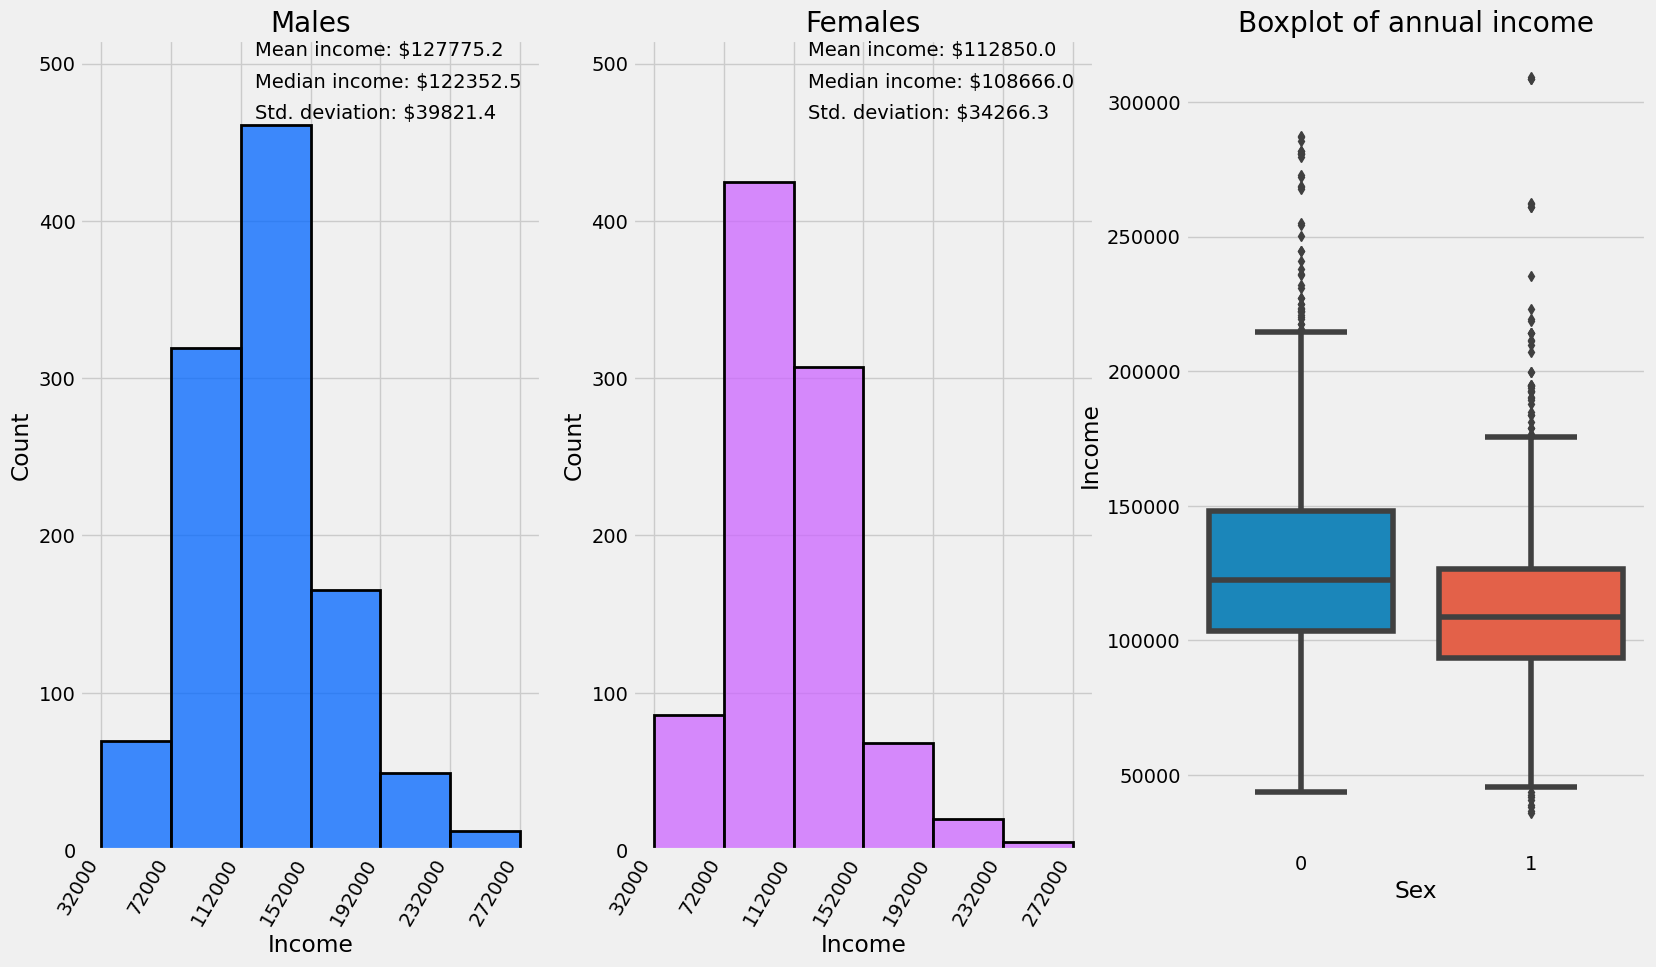

In [16]:
# Data subsets
males_income = segmentation_df[segmentation_df['Sex'] == 0]['Income']
females_income = segmentation_df[segmentation_df['Sex'] == 1]['Income']

plot_mean_income(males_income, females_income, '#0066ff', '#cc66ff', 'Males', 'Females', 'Sex')

In [17]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_income, females_income)[1]))

Kolgomorov-Smirnov test p-value: 0.00


The average income of males is higher than that of females (\$127,775 versus \$112,850). Both of groups have similar standard deviations. The Kolgomorov-Smirnov test shows that there is statistical differences between these two groups.

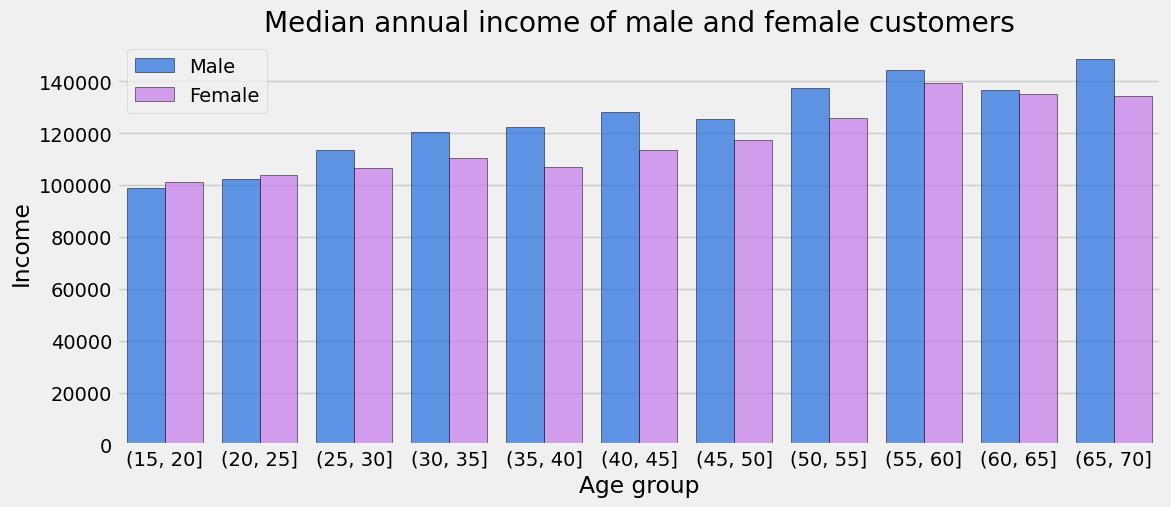

In [18]:
label_mapping = {0: 'Male', 1: 'Female'}
plt_title = 'Median annual income of male and female customers'
plot_income_by_age_groups('Sex', age_bins, label_mapping, '#0066ff', '#cc66ff', plt_title)

This shows us that the most wealthy customers are in age range of 55-70 years old. The biggest difference between women and men is visible in age groups 65-70 (male more rich) and 15-20 (female more rich).


Next, we will analyze the categorical variable `Maritial Status`.

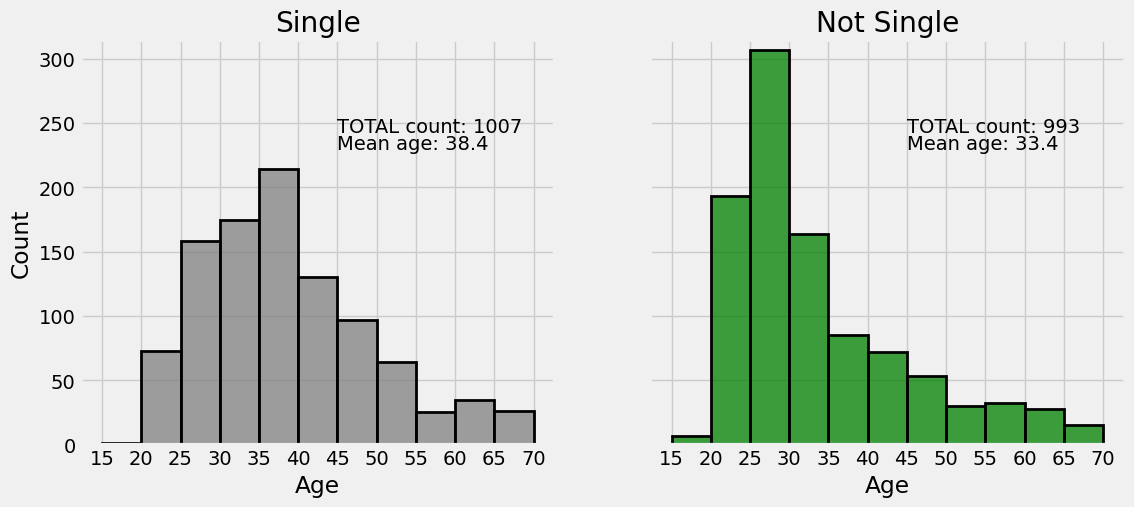

In [19]:
# Data subsets
single_age = segmentation_df[segmentation_df['Marital status'] == 0]['Age']
non_single_age = segmentation_df[segmentation_df['Marital status'] == 1]['Age']

plot_age_bins(single_age, non_single_age,'grey','green','Single', 'Not Single')

In [20]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(single_age, non_single_age)[1]))

Kolgomorov-Smirnov test p-value: 0.00


Surprisingly, the mean age of singles is higher than the mean age of non-singles (38.4 years versus 33.4 years). The Kolgomorov-Smirnov test shows that the differences between these two groups are statistically significant. There are also more singles than non-singles.

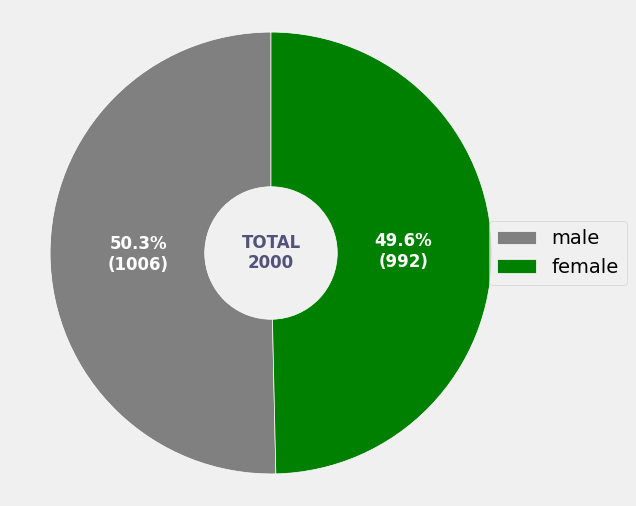

In [21]:
sizes = [single_age.count(),non_single_age.count()] # wedge sizes

make_pie_chart(sizes, 'grey','green', (0.8, 0, 0.5, 1))

Singles account for slightly more than 50% of the total customers.

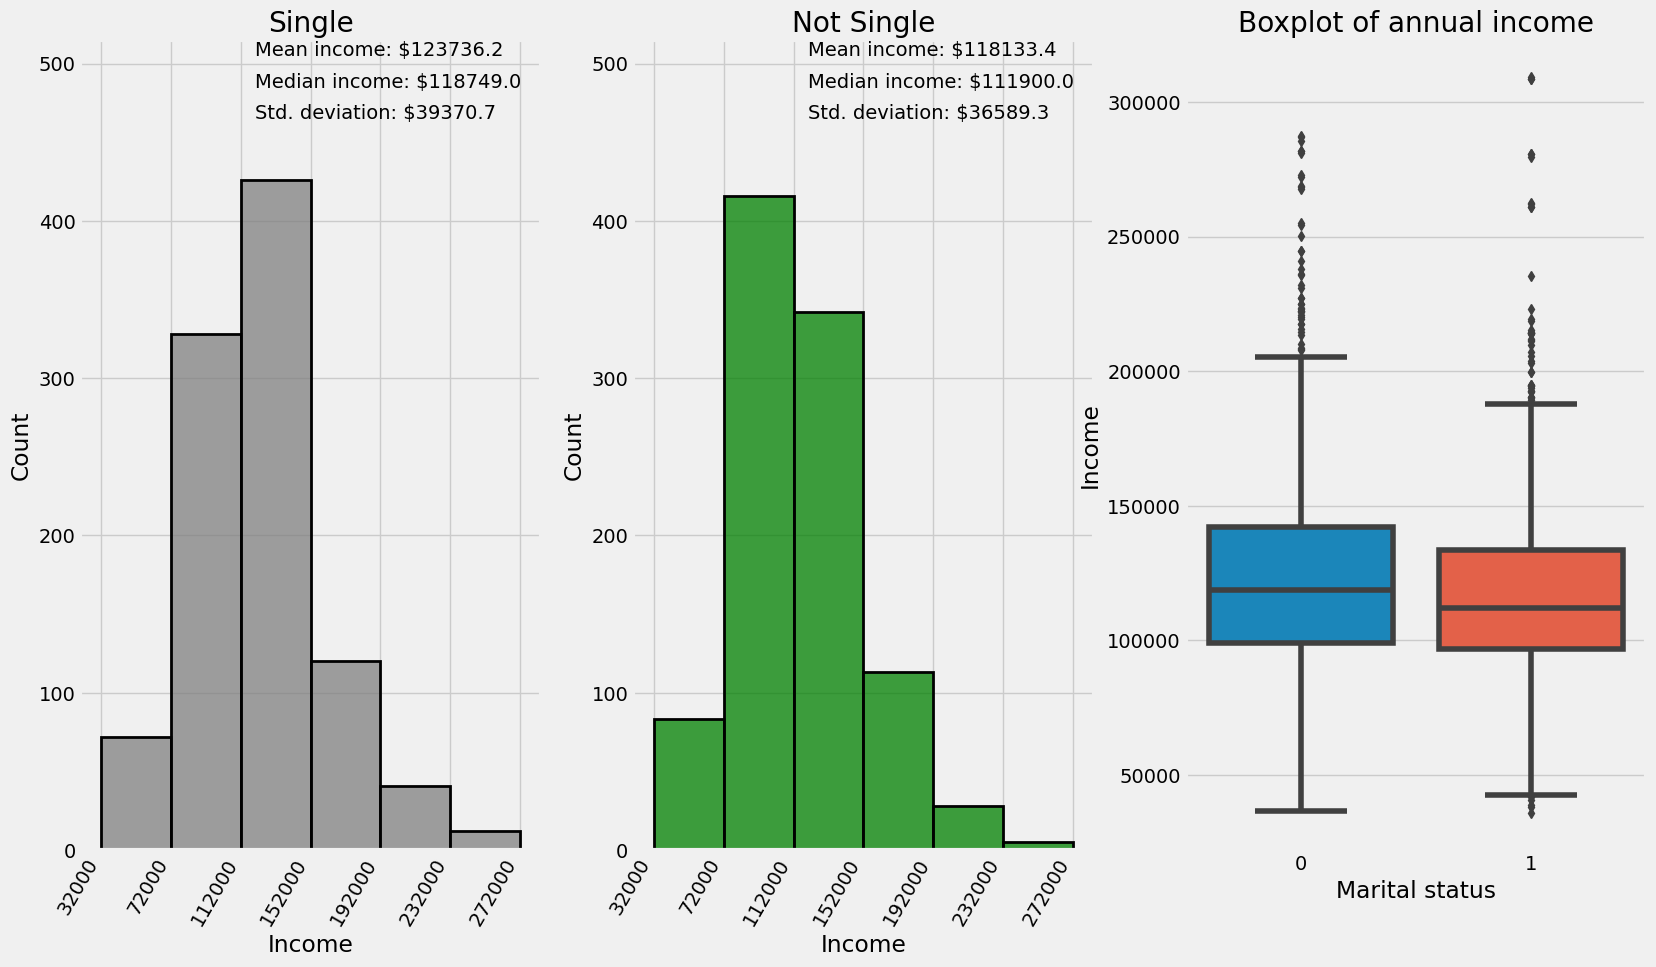

In [22]:
# Data subsets
single_income = segmentation_df[segmentation_df['Marital status'] == 0]['Income']
non_single_income = segmentation_df[segmentation_df['Marital status'] == 1]['Income']

plot_mean_income(single_income, non_single_income, 'grey', 'green', 'Single', 'Not Single', 'Marital status')

In [23]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(single_income, non_single_income)[1]))

Kolgomorov-Smirnov test p-value: 0.00


Suprisingly, the mean income of singles is higher than that of non-singles      (\$123,736 versus \$118,133). The K-S test shows that the difference between these two groups are statistically significant.

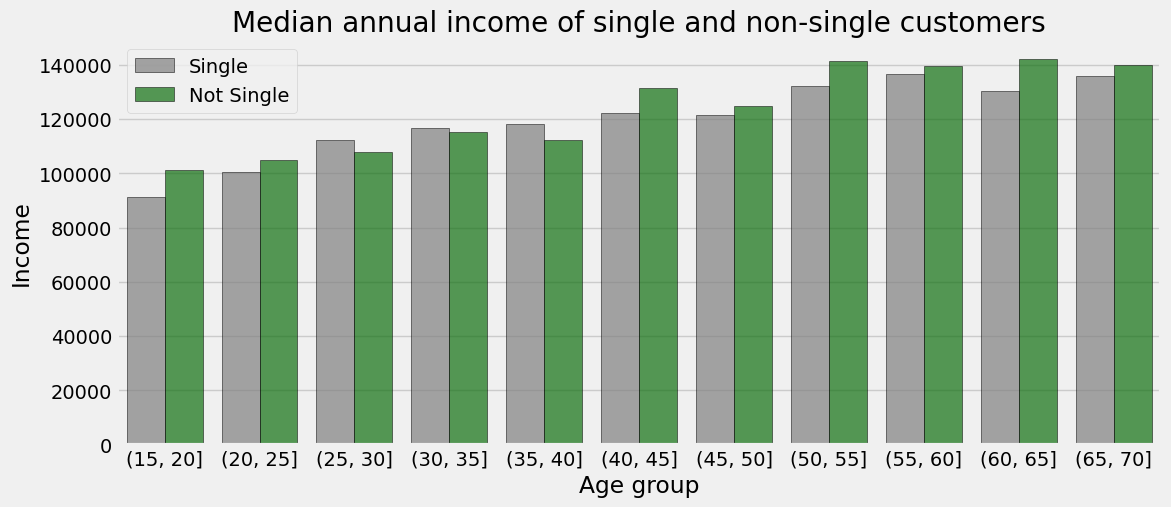

In [24]:
label_mapping = {0: 'Single', 1: 'Not Single'}
plt_title = 'Median annual income of single and non-single customers'
plot_income_by_age_groups('Marital status', age_bins, label_mapping, 'grey', 'green', plt_title)

As before, the most wealthy customers are in age range of 55-70 years old. The biggest difference between single and non-single is visible in age groups 35-40 (single more rich) and 15-20 (not single more rich).

#### Correlations

We will now investigate correlations between numerical variables.

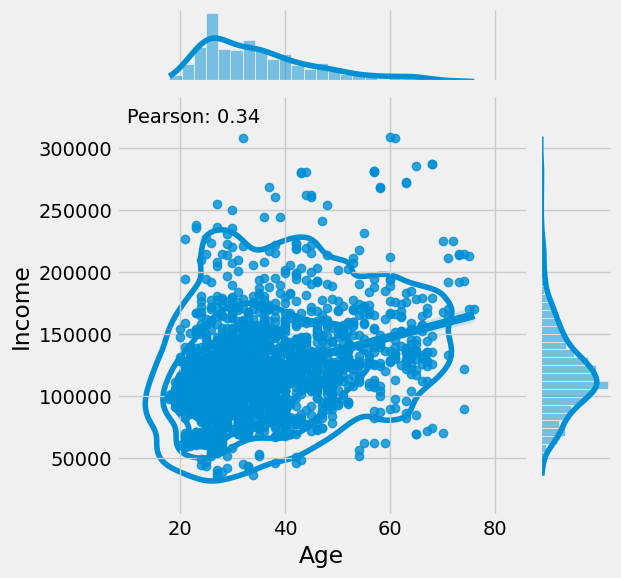

In [25]:
# calculating Pearson's correlation
corr, _ = pearsonr(segmentation_df['Age'], segmentation_df['Income'])

jp = (sns.jointplot(data=segmentation_df, x='Age', y='Income',
                    kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)

plt.text(10,320000, 'Pearson: {:.2f}'.format(corr))
plt.show()

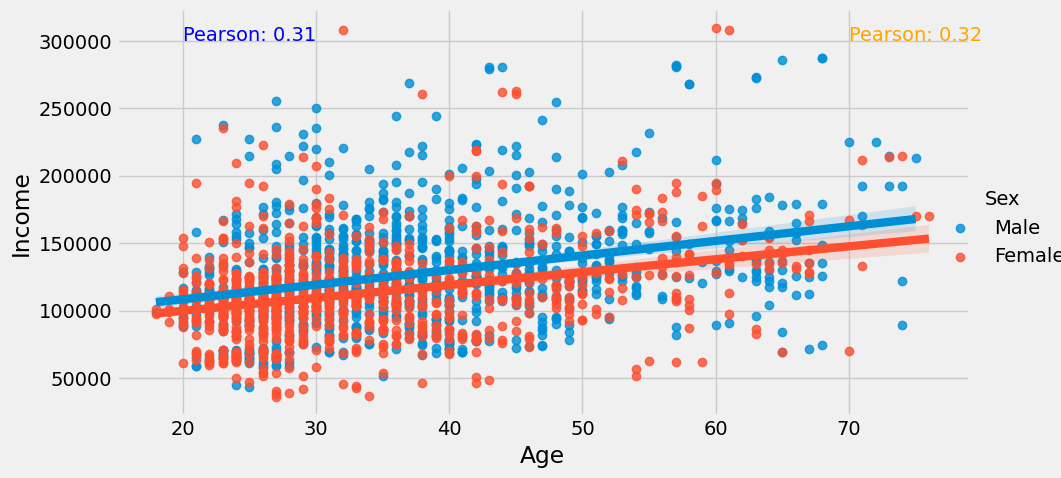

In [26]:
# Calculate Pearson Correlation between Age and Income
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)
visual_corr(segmentation_df, corr1, corr2, 'Age', 'Income', 'Sex', 'Male', 'Female')

There is a slight correlation between age and annual income for male and female customers.

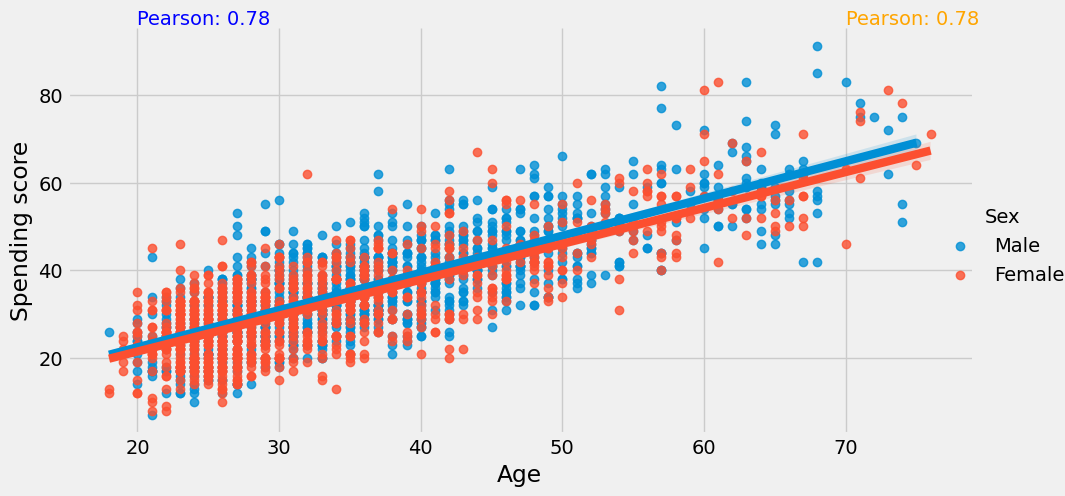

In [27]:
# Calculate Pearson Correlation between Age and Spending Score
males_spending = segmentation_df[segmentation_df['Sex']==0]['Spending score']
females_spending = segmentation_df[segmentation_df['Sex']==1]['Spending score']
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)
visual_corr(segmentation_df, corr1, corr2, 'Age', 'Spending score', 'Sex', 'Male', 'Female')

There is also a stronger correlation between age and spending score for male and female customers.

We will also construct a heatmap to visualize correlations between all variables.

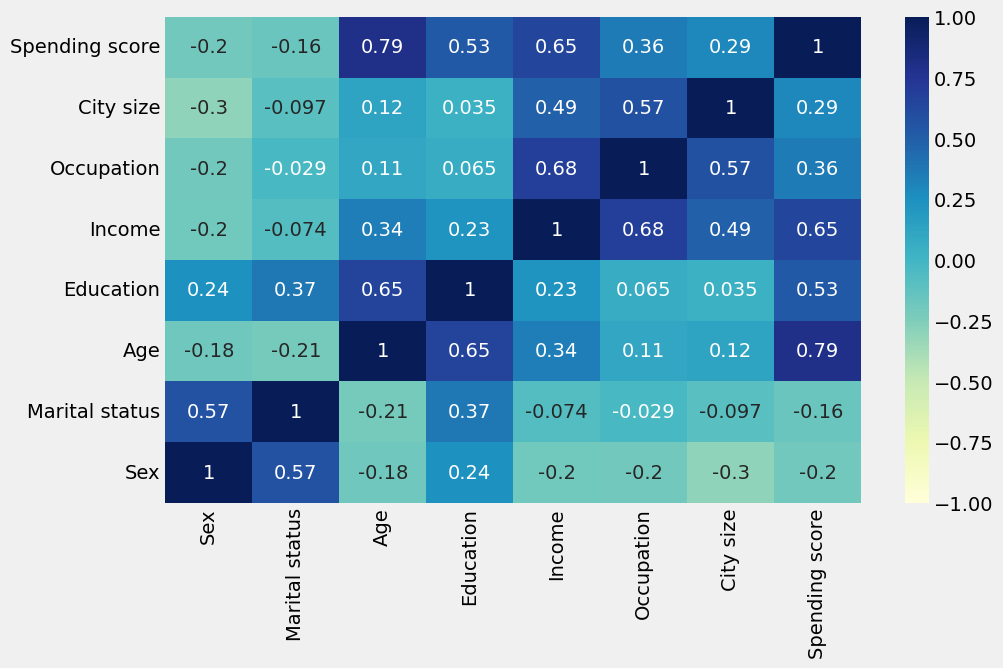

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
# segmentation_df_copy = segmentation_df.copy()
# corr_df = segmentation_df_copy.drop(columns=['Spending score'])
sns.heatmap(segmentation_df.corr(), vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

## Data Visualization

For the remaining categorical columns, we will visualize data to become more familiar with the data. For brevity, we will restrict our analysis to comparison with income.

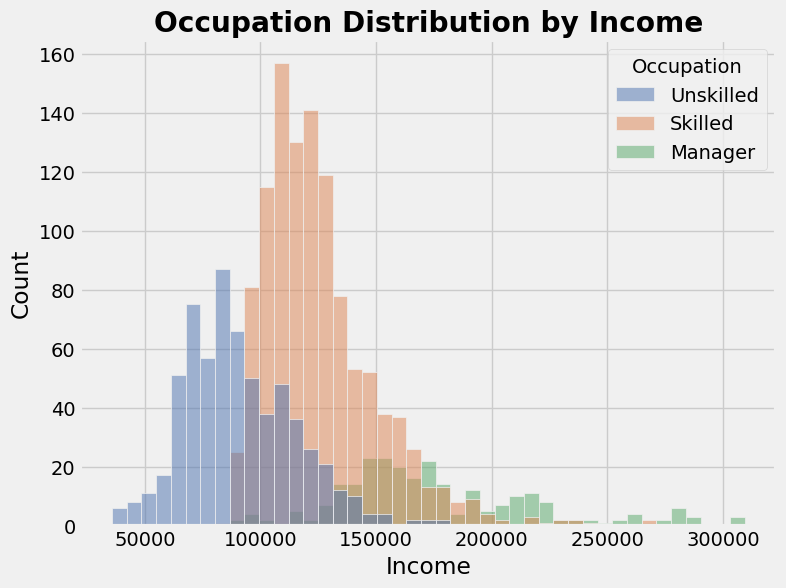

In [29]:
# Distribution of Income by Occupation
plt_title = 'Occupation Distribution by Income'
leg_entries = ['Unskilled', 'Skilled', 'Manager']
plot_distribution_by_income('Occupation', plt_title, leg_entries)

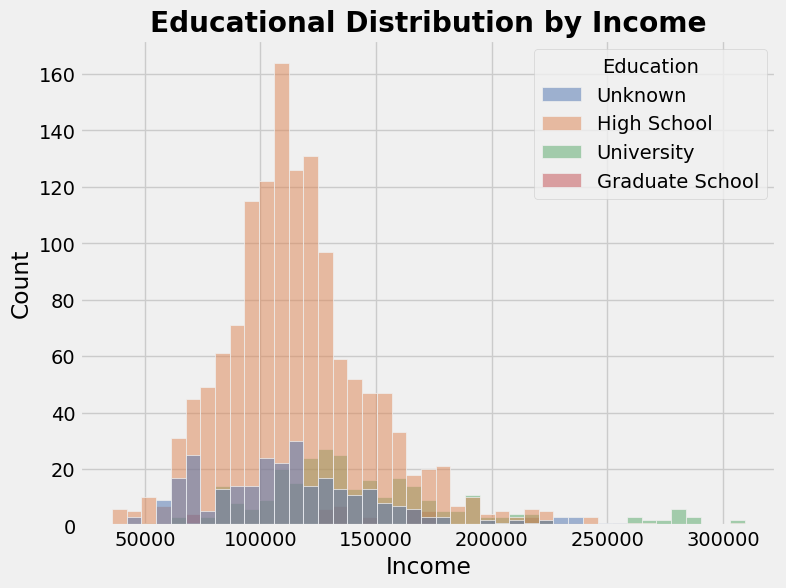

In [30]:
# Distribution of Income by Educational Achievement
plt_title = 'Educational Distribution by Income'
leg_entries = ['Unknown', 'High School', 'University', 'Graduate School']
plot_distribution_by_income('Education', plt_title, leg_entries)

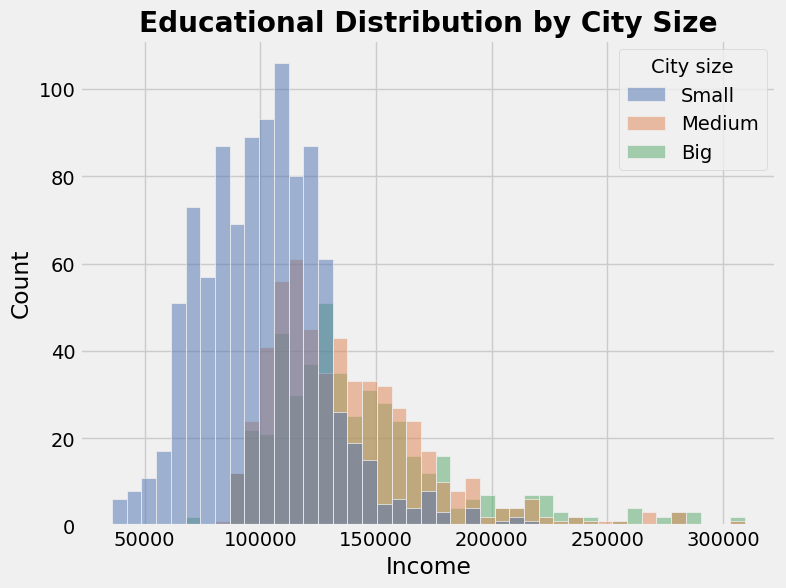

In [31]:
# Distribution of Income by City Size
plt_title = 'Educational Distribution by City Size'
leg_entries = ['Small', 'Medium', 'Big']
plot_distribution_by_income('City size', plt_title, leg_entries)

These results match out intuition - highly skilled workers recieve higher pay and those in large cities have a higher annual income than those in small cities. Let's also visualize the numerical variables against the categorical variables.

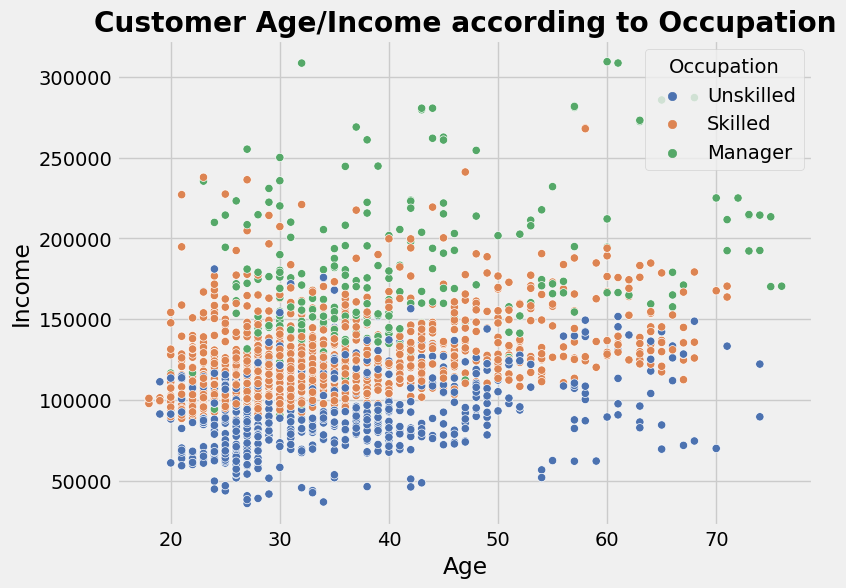

In [32]:
plt_title = 'Customer Age/Income according to Occupation'
leg_entries = ['Unskilled', 'Skilled', 'Manager']
plot_age_vs_income_scatter('Occupation', plt_title, leg_entries)

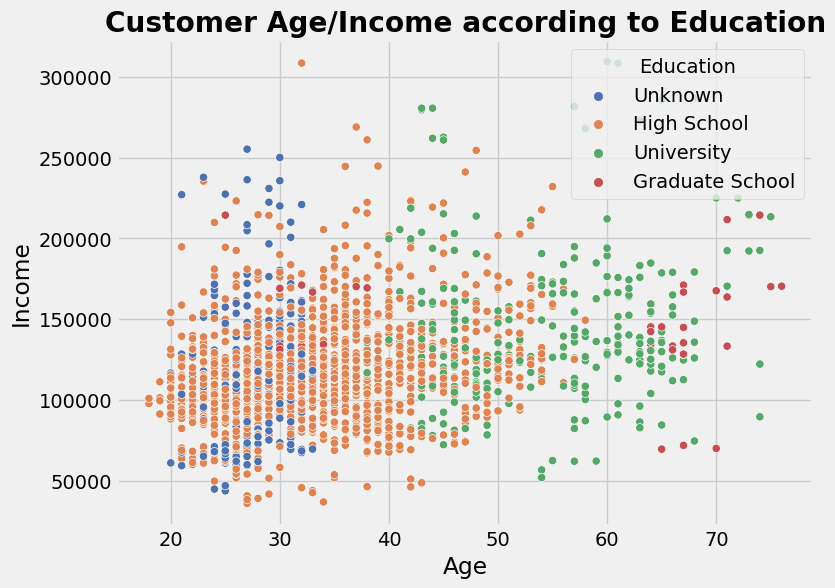

In [33]:
plt_title = 'Customer Age/Income according to Education'
leg_entries = ['Unknown', 'High School', 'University', 'Graduate School']
plot_age_vs_income_scatter('Education', plt_title, leg_entries)

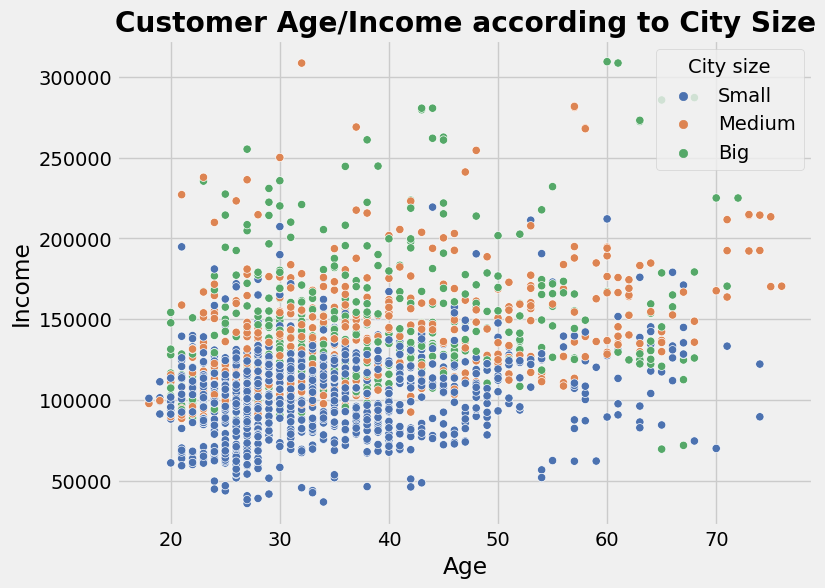

In [34]:
plt_title = 'Customer Age/Income according to City Size'
leg_entries = ['Small', 'Medium', 'Big']
plot_age_vs_income_scatter('City size', plt_title, leg_entries)

## Clustering

We now describe and analyze three different clustering algorithms:

- K-Means
- Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
- Gaussian mixture models (GMM)


### K-Means
For clustering only numeric columns are used. Therefore, we will not include the categorical variables.

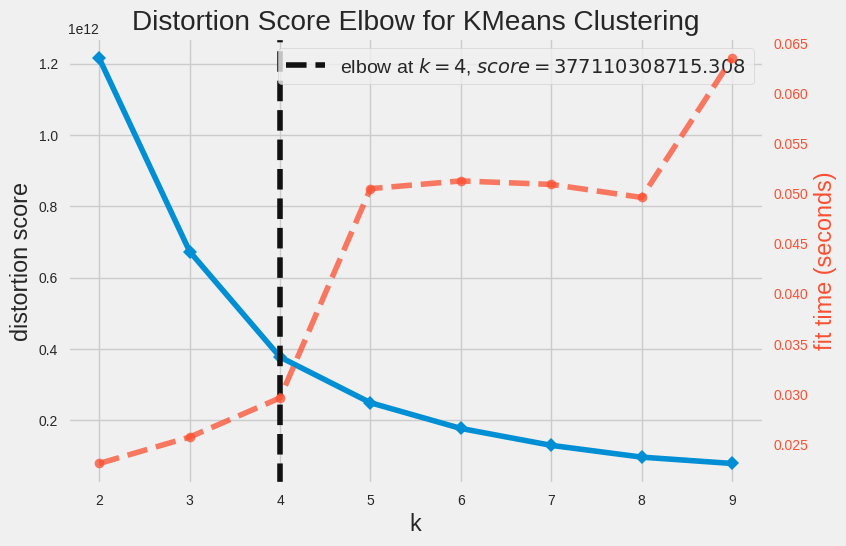

In [73]:
X_num = segmentation_df[['Age', 'Income', 'Spending score']]
model = KMeans(n_init=10, random_state=123)
visualizer = KElbowVisualizer(model, n_init=10, k=(2,10))

visualizer.fit(X_num)
visualizer.show()
plt.show()


The graph above shows the reduction of a distortion score as the number of clusters increases. The underlying algorithm suggests 4 clusters. Another way to choose the best number of clusters is to plot the silhuette score in a function of number of clusters. Let's see the results.


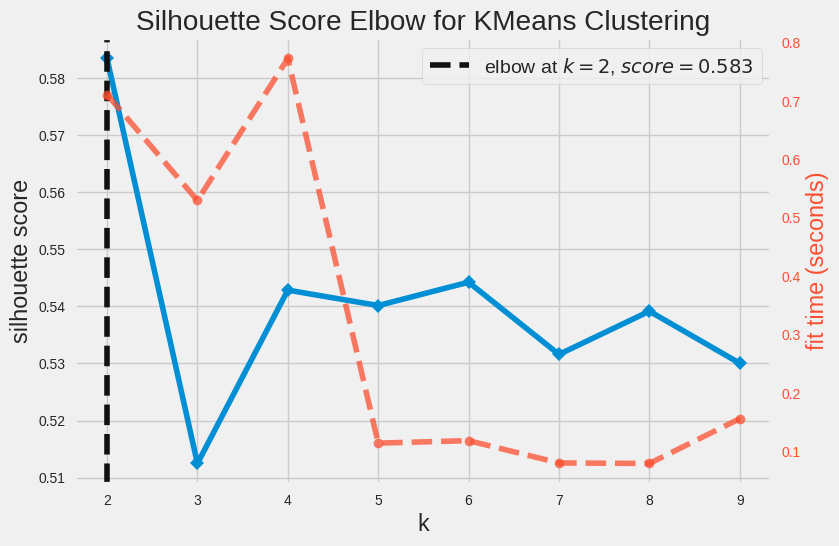

In [74]:
model = KMeans(n_init=10, random_state=123)
visualizer = KElbowVisualizer(model, k=(2,10), n_init=10, metric='silhouette')

visualizer.fit(X_num)
visualizer.show()
plt.show()

This time the silhouette score suggests 2 clusters. We will try 2 and 4 clusters.

##### 2 Clusters

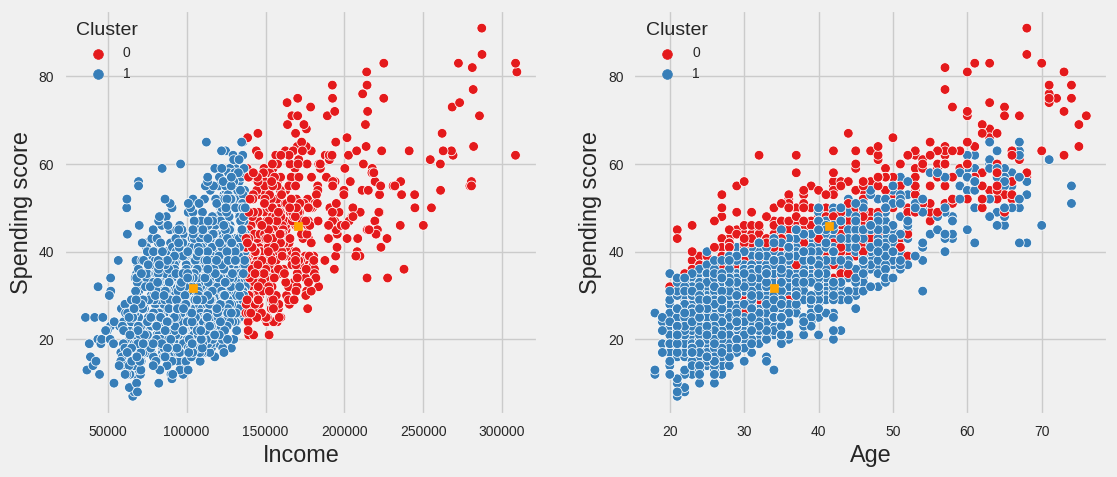

In [97]:
# Visualize 2 clusters
KM_clustered = visualize_knn_clusters(2, X_num)


The K-Means algorithm generated the following clusters:

- 1 group where consumers have a **low-medium** annual income and **low-medium** spending score
- 1 groups where consumers have a **high** annual income and **high** spending score
- 2 groups where a **higher age** generally increases the spending score



In [98]:
# Cluster size
KM_clust_sizes = KM_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["Size"]
KM_clust_sizes

,Size
Cluster,
0,511
1,1489


Suprisingly, the larger cluster is number 1 with 1489 clients (which mostly consist of members with a lower spending score). Only 511 clients are in cluster 1. We can check the quality of both clusters through a Silhuette plot.

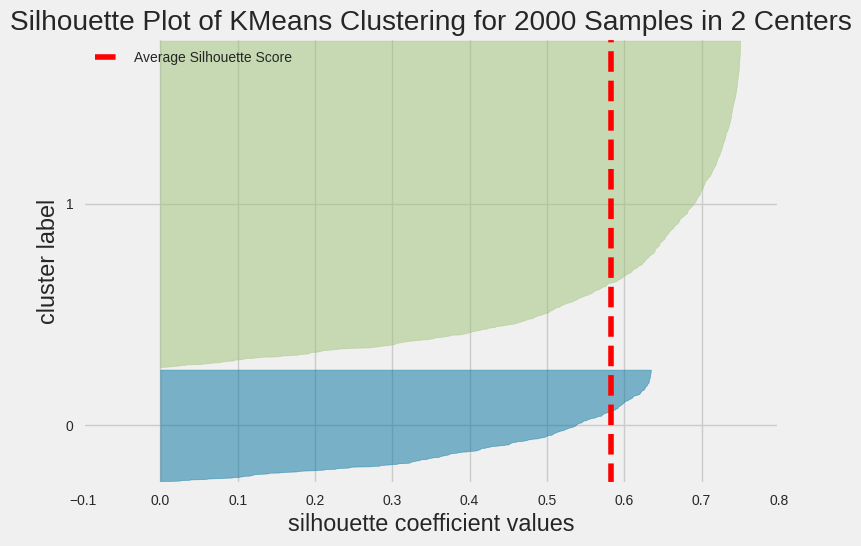

In [99]:
model = KMeans(n_clusters=2, n_init= 10, random_state=123)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_num)
visualizer.show()
plt.show()

##### 4 Clusters

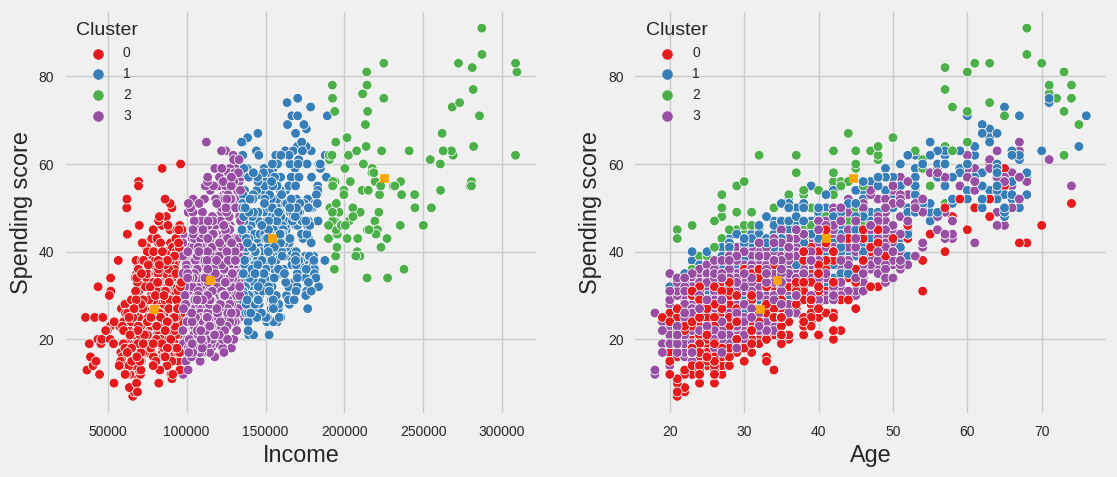

In [87]:
# Visualize 4 clusters
KM_clustered = visualize_knn_clusters(4, X_num)

The K-Means algorithm generated the following clusters:

- 1 group where consumers have a **low** annual income and **low** spending score
- 2 groups where consumers have a  **medium** annual income and **medium** spending score
- 1 group where consumers have a **high** annual income and **high** spending score
- 4 groups where a **higher age** generally **increases** the spending score


In [89]:
# Cluster size
KM_clust_sizes = KM_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["Size"]
KM_clust_sizes

,Size
Cluster,
0,486
1,455
2,105
3,954


The two largest clusters  are number 0 and 1 with 486 and 455 clients (with small or medium annual income clients). The higher income clients correspond to clusters 2 and 3. To check the quality of each cluster we construct a Silhuette plot.


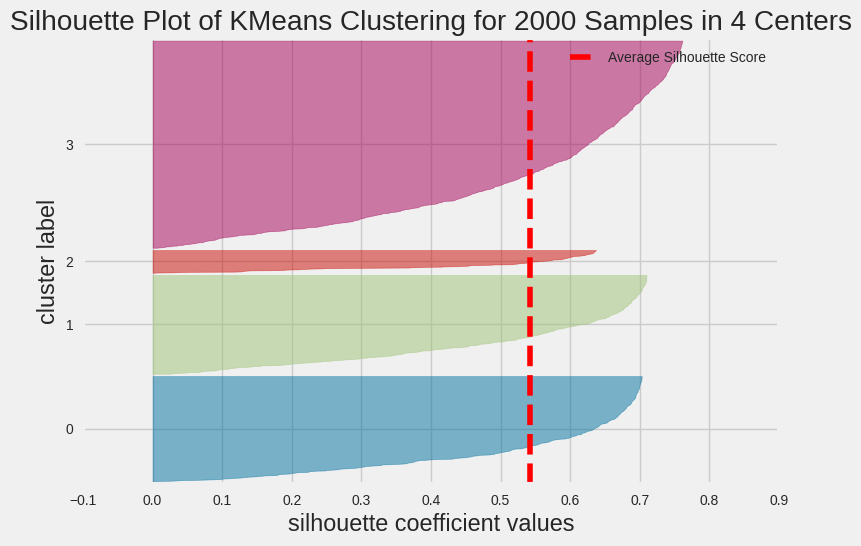

In [96]:
model = KMeans(n_clusters=4, n_init= 10, random_state=123)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_num)
visualizer.show()
plt.show()

### DB-Scan

In DBSCAN there are two major hyperparameters:

- `eps`
- `min_samples`

It is difficult arbitrarily to say what values will work the best. Therefore, we will investigate combinations.


In [171]:
eps_values = np.arange(2,16,0.5) # eps values to be investigated
min_samples = np.arange(2,10) # min_samples to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

Because DBSCAN creates clusters itself based on those two parameters let's check the number of generated clusters.


In [172]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_num)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    if len(np.unique(DBS_clustering.labels_)) > 1:
        sil_score.append(silhouette_score(X_num, DBS_clustering.labels_))

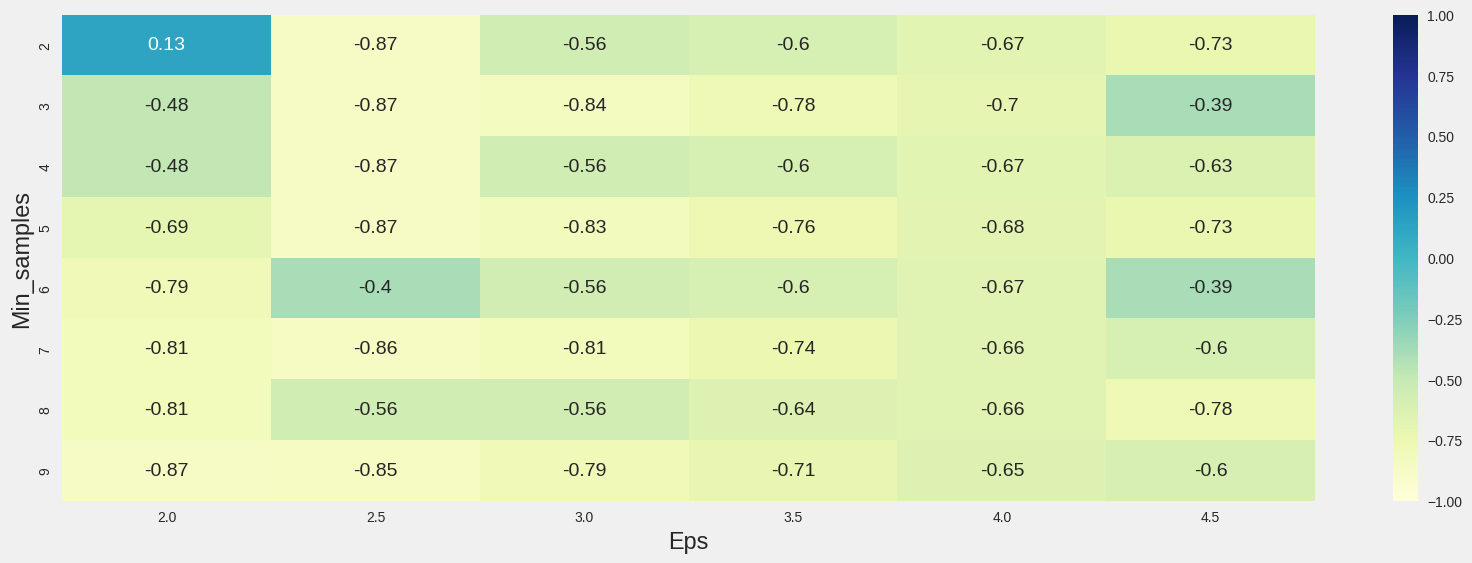

In [173]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp = tmp.reindex(range(len(sil_score)))
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
plt.show()

The maximum is at `eps=2` and `min_samples=2`.

In [176]:
DBS_clustering = DBSCAN(eps=2, min_samples=2).fit(X_num)

DBSCAN_clustered = X_num.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [177]:
# Cluster Size
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["Size"]
DBSCAN_clust_sizes

,Size
Cluster,
-1,1998
0,2


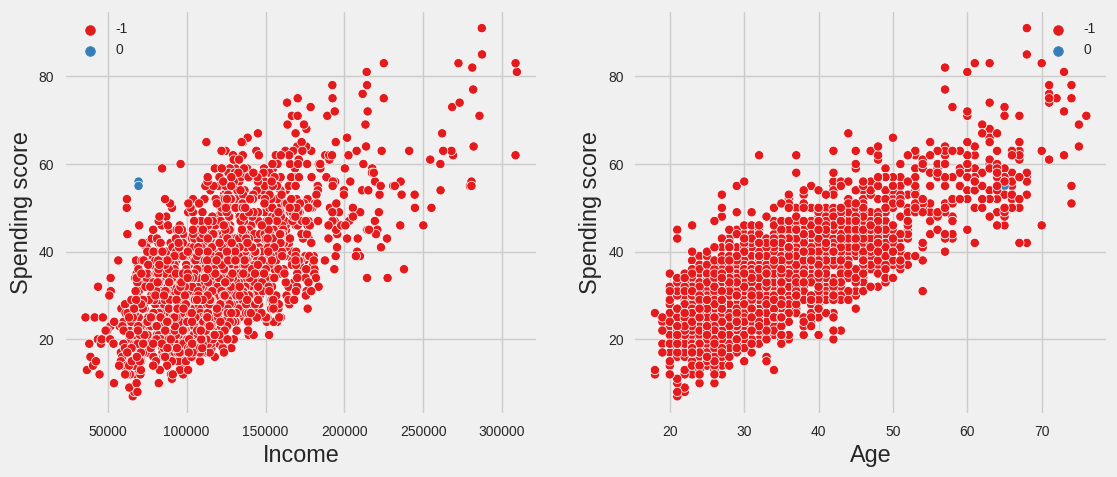

In [178]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot(data=DBSCAN_clustered,
                x='Income', y='Spending score',
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(data=DBSCAN_clustered,
                x='Age', y='Spending score',
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

# axes[0].scatter(outliers['Income'], outliers['Spending score'], s=5, label='outliers', c="k")
# axes[1].scatter(outliers['Age'], outliers['Spending score'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

This technique definitely flopped with our dataset.

## Dimensionality Reduction (PCA, t-SNE, and UMAP)

## Best Performing Model

We will now compare our scores from cross validation.

In [ ]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
kfold_df['avg_explained_variance'] = kfold_df.mean(axis=1)
kfold_df.sort_values(['avg_explained_variance'],ascending=False)
kfold_df.style.hide(axis="index")

In [ ]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
kfold_mae_df['avg_neg_means_abs_error'] = kfold_mae_df.mean(axis=1)
kfold_mae_df.sort_values(['avg_neg_means_abs_error'],ascending=False)
kfold_mae_df.style.hide(axis="index")

From these statistics, the best performing model is the KNN Neighbors Regressor. We can see that our improved model greatly enchances the predicted average temperature.

In [ ]:
# MAE
print('KNN Regressor MAE (in degrees):', round(mean_absolute_error(y_train,knn_model.predict(X_train)),2))
print('KNN Regressor MAE (in degrees):', round(mean_absolute_error(y_test,knn_model.predict(X_test)),2))

Instead of being off by 2.03 degrees, our best performing model is accurate to around 0.24 degrees in the Test set. We also get good accuracy with the KNN regressor model.

In [ ]:
mape = mean_absolute_percentage_error(y_test, knn_model.predict(X_test)) * 100
accuracy = 100 - mape
print("Accuracy of KNN Regressor Model:", round(accuracy,2), "%.")

## Discussion and Recommendations

Conclusions from our analysis:
* In this project, we used historical data from the Berkeley Earth Climate Change: Earth Surface Temperature Dataset to predict the Average Land and Surface Temperature using Average Land Temperature, Minimum Land Temperature, and Maximum Land Temperature as features.
* As our target variable is continuous and we know the target and feature variables, we created a supervised regression machine learning model. We tested several algorithms including Linear Regression, KNN, Random Forest, Support Vector Machine, and Gradient Boosting. Using GridSearchCV to find optimal hyperparameters, we found that our KNN regressor model had the best performance metrics.
* Our original model had a baseline MAE of 2.03 degrees. After performing our optimized machine learning algorithm, the MAE is the test set was decreased to 0.25 degrees. So, our model accurately predicted the average temperature.

Recommendations for further research:
* The [Berkeley Earth Climate Change study](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data) includes separate data for Global Average Land Temperature by Country, Global Average Land Temperature by State, and Global Land Temperatures By City. A separate analysis could be performed on these datasets which would also include the creation of supervised linear regression models.
* As the temperature data is in the form of time series, one could also use a Recurrent Neural Network (RNN) to predict feature temperatures. This would potentially use a GRU or LSTM. A simplified model on a different dataset is shown [here](https://github.com/tirthajyoti/Deep-learning-with-Python/blob/master/Notebooks/Weather-RNN.ipynb).
* Instead of predicting the average temperature, one could predict the causes of temperature change. This is an [active area of research](https://www.gfdl.noaa.gov/news/noaa-scientists-harness-machine-learning-to-advance-climate-models/) from which machine learning models could potentially help climate scientists and engineers.
